In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%pip install pandas_datareader
import pandas_datareader as pdr
import tensorflow as tf

In [2]:
###### Data Collection ######

In [3]:
key = '3a7c40955261a6e67c378fa1fb12cc9d7ad8bd3f'

In [4]:
df1 = pdr.get_data_tiingo('TTM', api_key = key)   # TTM for TATA MOTORS LTD

C:\Users\Anuj Verma\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df1.to_csv('TTM.csv')

In [6]:
df2 = pd.read_csv('TTM.csv')

In [7]:
df2.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TTM,2017-11-17 00:00:00+00:00,32.48,32.65,32.06,32.08,1205655,32.48,32.65,32.06,32.08,1205655,0.0,1.0
1,TTM,2017-11-20 00:00:00+00:00,32.36,32.50,32.14,32.47,670426,32.36,32.50,32.14,32.47,670426,0.0,1.0
2,TTM,2017-11-21 00:00:00+00:00,32.72,32.81,32.45,32.50,601697,32.72,32.81,32.45,32.50,601697,0.0,1.0
3,TTM,2017-11-22 00:00:00+00:00,32.89,32.99,32.80,32.81,617698,32.89,32.99,32.80,32.81,617698,0.0,1.0
4,TTM,2017-11-24 00:00:00+00:00,32.74,32.92,32.56,32.90,504454,32.74,32.92,32.56,32.90,504454,0.0,1.0


In [8]:
df2.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TTM,2022-11-09 00:00:00+00:00,26.40,26.55,25.79,25.86,1261624,26.40,26.55,25.79,25.86,1261624,0.0,1.0
1253,TTM,2022-11-10 00:00:00+00:00,26.33,26.73,25.81,26.18,989653,26.33,26.73,25.81,26.18,989653,0.0,1.0
1254,TTM,2022-11-11 00:00:00+00:00,26.56,26.64,26.30,26.30,968771,26.56,26.64,26.30,26.30,968771,0.0,1.0
1255,TTM,2022-11-14 00:00:00+00:00,27.10,27.22,26.63,26.87,1197524,27.10,27.22,26.63,26.87,1197524,0.0,1.0
1256,TTM,2022-11-15 00:00:00+00:00,27.03,27.50,26.93,27.28,969017,27.03,27.50,26.93,27.28,969017,0.0,1.0


In [9]:
df3 = df2.reset_index()['close']

In [10]:
df3.shape

(1257,)

In [11]:
df3

0       32.48
1       32.36
2       32.72
3       32.89
4       32.74
        ...  
1252    26.40
1253    26.33
1254    26.56
1255    27.10
1256    27.03
Name: close, Length: 1257, dtype: float64

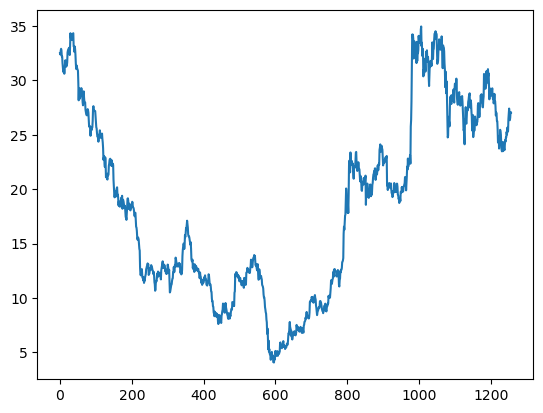

In [12]:
plt.plot(df3)

In [13]:
###### Data Processing ######

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df4 = scaler.fit_transform(np.array(df3).reshape(-1,1))

In [15]:
df4

array([[0.92028516],
       [0.91639663],
       [0.92806222],
       ...,
       [0.72845107],
       [0.74594945],
       [0.74368114]])

In [16]:
training_size = int(len(df4)*0.70)
test_size = len(df4) - training_size
training_size, test_size

(879, 378)

In [17]:
train_data, test_data = df4[0:training_size, :], df4[training_size:len(df1),:1]
len(train_data), len(test_data)

(879, 378)

In [18]:
def create_model_data (model_data, time_step):
    dataX, dataY = [],[]
    for i in range(len(model_data) - time_step - 1):
        a = model_data[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(model_data[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_model_data(train_data, time_step)
X_test, y_test = create_model_data(test_data, time_step)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((778, 100), (778,), (277, 100), (277,))

In [21]:
X_train

array([[0.92028516, 0.91639663, 0.92806222, ..., 0.74886585, 0.74821776,
        0.73363577],
       [0.91639663, 0.92806222, 0.93357097, ..., 0.74821776, 0.73363577,
        0.71516526],
       [0.92806222, 0.93357097, 0.9287103 , ..., 0.73363577, 0.71516526,
        0.70025924],
       ...,
       [0.26668827, 0.2624757 , 0.23039533, ..., 0.54990279, 0.55962411,
        0.56124433],
       [0.2624757 , 0.23039533, 0.22618276, ..., 0.55962411, 0.56124433,
        0.56966948],
       [0.23039533, 0.22618276, 0.24530136, ..., 0.56124433, 0.56966948,
        0.55605962]])

In [22]:
y_train

array([0.71516526, 0.70025924, 0.69637071, 0.68211277, 0.67303953,
       0.67303953, 0.66623461, 0.65716137, 0.66720674, 0.67854828,
       0.68178872, 0.69086196, 0.6801685 , 0.669151  , 0.67984446,
       0.67757615, 0.66850292, 0.68114064, 0.66558652, 0.65521711,
       0.63771873, 0.60304601, 0.61017498, 0.61373947, 0.59105638,
       0.58165911, 0.61017498, 0.59332469, 0.55119896, 0.55832793,
       0.55411536, 0.55119896, 0.54439404, 0.56189242, 0.55670771,
       0.55962411, 0.58587168, 0.59138043, 0.60207388, 0.60563837,
       0.60628645, 0.60012962, 0.59105638, 0.58554763, 0.60174984,
       0.5845755 , 0.5926766 , 0.58684381, 0.58878808, 0.54374595,
       0.52365522, 0.5029164 , 0.49157485, 0.50129618, 0.50939728,
       0.50486066, 0.49416721, 0.51231367, 0.51847051, 0.52138691,
       0.49837978, 0.49967596, 0.49027868, 0.46727155, 0.47926118,
       0.4669475 , 0.46403111, 0.46370706, 0.47018795, 0.47634478,
       0.4889825 , 0.47504861, 0.49157485, 0.49611147, 0.45755

In [23]:
# Make the data 3-dimensional for input as a LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
##### Model Building ######

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 18s 599ms/step - loss: 0.0348 - val_loss: 0.0998
Epoch 2/100
13/13 [==============================] - 5s 403ms/step - loss: 0.0070 - val_loss: 0.0106
Epoch 3/100
13/13 [==============================] - 5s 381ms/step - loss: 0.0034 - val_loss: 0.0065
Epoch 4/100
13/13 [==============================] - 6s 503ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 5/100
13/13 [==============================] - 3s 212ms/step - loss: 0.0023 - val_loss: 0.0060
Epoch 6/100
13/13 [==============================] - 3s 198ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 7/100
13/13 [==============================] - 3s 210ms/step - loss: 0.0019 - val_loss: 0.0058
Epoch 8/100
13/13 [==============================] - 3s 216ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 9/100
13/13 [==============================] - 3s 216ms/step - loss: 0.0017 - val_loss: 0.0053
Epoch 10/100
13/13 [==============================] - 3s 208ms/step - loss: 0.0016 - val_l

In [28]:
X_train_predict = model.predict(X_train)
X_test_predict = model.predict(X_test)

9/9 [==============================] - 0s 43ms/step


In [29]:
X_train_predict = scaler.inverse_transform(X_train_predict)
X_test_predict = scaler.inverse_transform(X_test_predict)

In [30]:
X_train_predict.shape, X_test_predict.shape

((778, 1), (277, 1))

In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, X_train_predict))

13.788649173814921

In [32]:
np.sqrt(mean_squared_error(y_test, X_test_predict))

27.63047314034028

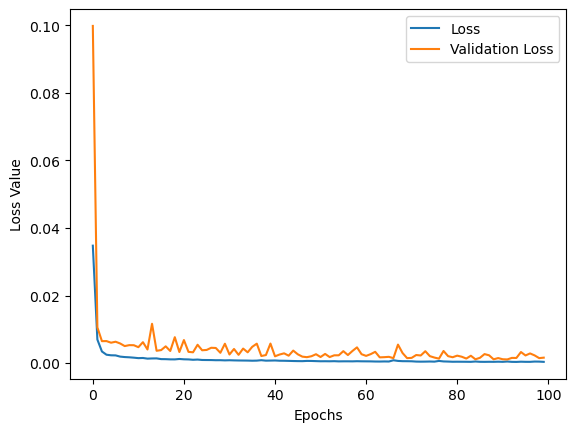

In [33]:
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()

In [35]:
###### Plotting the data and predictions ######

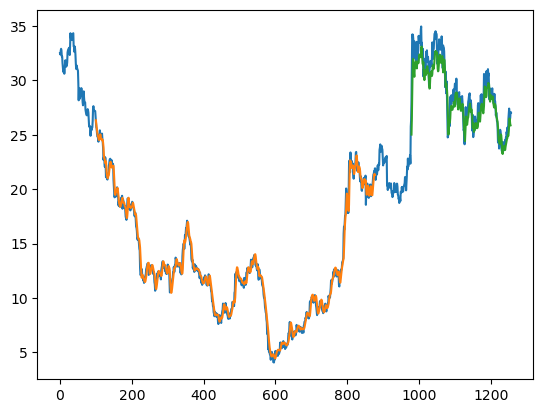

In [36]:
prev_step = 100
train_predict_plot = np.empty_like(df4)
train_predict_plot[:, :] = np.nan
train_predict_plot[prev_step:len(X_train_predict)+prev_step, :] = X_train_predict

prev_step = 100
test_predict_plot = np.empty_like(df4)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(X_train_predict)+(prev_step*2)+1:len(df4)-1, :] = X_test_predict

plt.plot(scaler.inverse_transform(df4))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [37]:
##### Next 30 days Prediction #####

In [38]:
len(test_data)

378

In [39]:
prev_data_2 = 100
x_input = test_data[len(test_data) - prev_data_2: ].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [41]:
temp_input    # Last 100 data of df4

[0.7226182760855476,
 0.7180816591056383,
 0.720349967595593,
 0.7060920285158782,
 0.7206740116655865,
 0.7148412184057031,
 0.7239144523655218,
 0.7653920933246922,
 0.7718729747245625,
 0.7511341542449773,
 0.7469215813350615,
 0.7303953337653921,
 0.7401166558651977,
 0.7692806221646143,
 0.7747893713545041,
 0.7955281918340894,
 0.7812702527543747,
 0.7984445884640311,
 0.7812702527543747,
 0.7754374594944913,
 0.7605314322747894,
 0.7592352559948153,
 0.7812702527543747,
 0.7919637070641607,
 0.8587167854828256,
 0.8515878159429682,
 0.8379779650032405,
 0.8259883344134802,
 0.814646791963707,
 0.8266364225534673,
 0.8250162022034996,
 0.8671419313026572,
 0.8321451717433571,
 0.8532080362929358,
 0.8515878159429682,
 0.8729747245625405,
 0.8532080362929358,
 0.8603370058327932,
 0.8165910563836682,
 0.7832145171743357,
 0.803953337653921,
 0.815294880103694,
 0.81399870382372,
 0.7939079714841217,
 0.7945560596241089,
 0.8071937783538561,
 0.8075178224238496,
 0.8159429682436812

In [42]:
from numpy import array

list_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])           
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        y_hat = model.predict(x_input, verbose = 0)  
        print("{} day output {}".format(i, y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1: ]                 
        list_output.extend(y_hat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_hat = model.predict(x_input, verbose = 0)  
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        list_output.extend(y_hat.tolist())
        i = i+1
print(list_output)

[0.7229066]
101
1 day input [0.71808166 0.72034997 0.70609203 0.72067401 0.71484122 0.72391445
 0.76539209 0.77187297 0.75113415 0.74692158 0.73039533 0.74011666
 0.76928062 0.77478937 0.79552819 0.78127025 0.79844459 0.78127025
 0.77543746 0.76053143 0.75923526 0.78127025 0.79196371 0.85871679
 0.85158782 0.83797797 0.82598833 0.81464679 0.82663642 0.8250162
 0.86714193 0.83214517 0.85320804 0.85158782 0.87297472 0.85320804
 0.86033701 0.81659106 0.78321452 0.80395334 0.81529488 0.8139987
 0.79390797 0.79455606 0.80719378 0.80751782 0.81594297 0.79423202
 0.78353856 0.786779   0.77122489 0.77965003 0.79941672 0.7757615
 0.77802981 0.7624757  0.73525599 0.74400518 0.73914452 0.7184057
 0.7184057  0.69313027 0.65456902 0.65748542 0.67174336 0.6367466
 0.65392093 0.65716137 0.69248218 0.6860013  0.67660402 0.65424498
 0.63285807 0.62832145 0.63480233 0.65554115 0.62896954 0.65230071
 0.65489307 0.63771873 0.63188594 0.64873623 0.66202203 0.65748542
 0.66979909 0.67012314 0.68632534 0.678

8 day output [[0.6820898]]
9 day input [0.75113415 0.74692158 0.73039533 0.74011666 0.76928062 0.77478937
 0.79552819 0.78127025 0.79844459 0.78127025 0.77543746 0.76053143
 0.75923526 0.78127025 0.79196371 0.85871679 0.85158782 0.83797797
 0.82598833 0.81464679 0.82663642 0.8250162  0.86714193 0.83214517
 0.85320804 0.85158782 0.87297472 0.85320804 0.86033701 0.81659106
 0.78321452 0.80395334 0.81529488 0.8139987  0.79390797 0.79455606
 0.80719378 0.80751782 0.81594297 0.79423202 0.78353856 0.786779
 0.77122489 0.77965003 0.79941672 0.7757615  0.77802981 0.7624757
 0.73525599 0.74400518 0.73914452 0.7184057  0.7184057  0.69313027
 0.65456902 0.65748542 0.67174336 0.6367466  0.65392093 0.65716137
 0.69248218 0.6860013  0.67660402 0.65424498 0.63285807 0.62832145
 0.63480233 0.65554115 0.62896954 0.65230071 0.65489307 0.63771873
 0.63188594 0.64873623 0.66202203 0.65748542 0.66979909 0.67012314
 0.68632534 0.67822424 0.69896306 0.68664938 0.6882696  0.72456254
 0.74141283 0.75567077 0.7

16 day output [[0.6547723]]
17 day input [0.79844459 0.78127025 0.77543746 0.76053143 0.75923526 0.78127025
 0.79196371 0.85871679 0.85158782 0.83797797 0.82598833 0.81464679
 0.82663642 0.8250162  0.86714193 0.83214517 0.85320804 0.85158782
 0.87297472 0.85320804 0.86033701 0.81659106 0.78321452 0.80395334
 0.81529488 0.8139987  0.79390797 0.79455606 0.80719378 0.80751782
 0.81594297 0.79423202 0.78353856 0.786779   0.77122489 0.77965003
 0.79941672 0.7757615  0.77802981 0.7624757  0.73525599 0.74400518
 0.73914452 0.7184057  0.7184057  0.69313027 0.65456902 0.65748542
 0.67174336 0.6367466  0.65392093 0.65716137 0.69248218 0.6860013
 0.67660402 0.65424498 0.63285807 0.62832145 0.63480233 0.65554115
 0.62896954 0.65230071 0.65489307 0.63771873 0.63188594 0.64873623
 0.66202203 0.65748542 0.66979909 0.67012314 0.68632534 0.67822424
 0.69896306 0.68664938 0.6882696  0.72456254 0.74141283 0.75567077
 0.72326636 0.72099806 0.72845107 0.74594945 0.74368114 0.72290659
 0.71863669 0.71079421

24 day output [[0.62749845]]
25 day input [0.85158782 0.83797797 0.82598833 0.81464679 0.82663642 0.8250162
 0.86714193 0.83214517 0.85320804 0.85158782 0.87297472 0.85320804
 0.86033701 0.81659106 0.78321452 0.80395334 0.81529488 0.8139987
 0.79390797 0.79455606 0.80719378 0.80751782 0.81594297 0.79423202
 0.78353856 0.786779   0.77122489 0.77965003 0.79941672 0.7757615
 0.77802981 0.7624757  0.73525599 0.74400518 0.73914452 0.7184057
 0.7184057  0.69313027 0.65456902 0.65748542 0.67174336 0.6367466
 0.65392093 0.65716137 0.69248218 0.6860013  0.67660402 0.65424498
 0.63285807 0.62832145 0.63480233 0.65554115 0.62896954 0.65230071
 0.65489307 0.63771873 0.63188594 0.64873623 0.66202203 0.65748542
 0.66979909 0.67012314 0.68632534 0.67822424 0.69896306 0.68664938
 0.6882696  0.72456254 0.74141283 0.75567077 0.72326636 0.72099806
 0.72845107 0.74594945 0.74368114 0.72290659 0.71863669 0.71079421
 0.70327371 0.69697797 0.6919567  0.68801141 0.68483531 0.68208981
 0.67946583 0.67672402 0.

In [43]:
len(list_output)

30

In [44]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

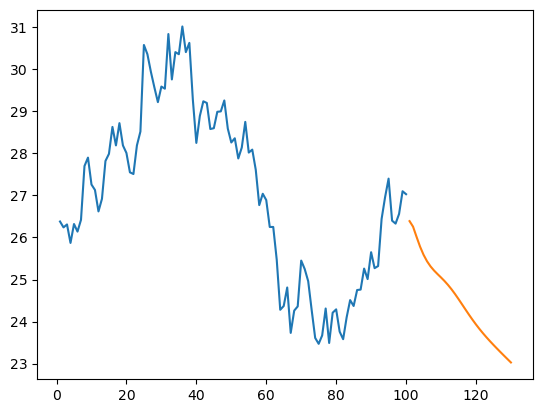

In [45]:
plt.plot(day_new, scaler.inverse_transform (df4[len(df4)-n_steps:]))
plt.plot(day_pred, scaler.inverse_transform(list_output))

Text(0.5, 1.0, 'Tata Motors Stock Graph')

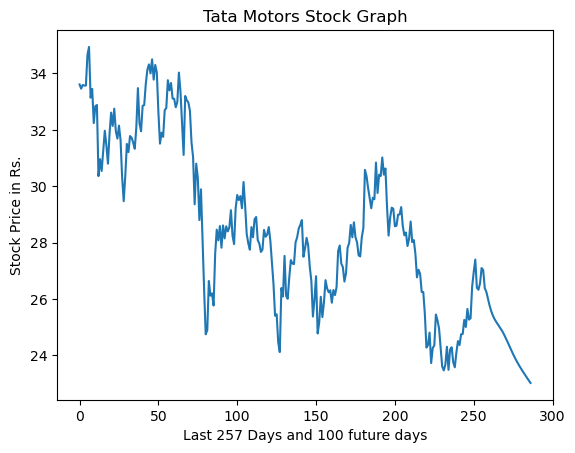

In [69]:
df5 = df4.tolist()
df5.extend((list_output))
df6 = scaler.inverse_transform(df5)
plt.plot(df6[1000:])
# 1257-1000=257;   len(df4)=1257
plt.xlabel("Last 257 Days and 100 future days")
plt.ylabel("Stock Price in Rs.")
plt.title("Tata Motors Stock Graph")